<a href="https://colab.research.google.com/github/dspark0419/DATA-201/blob/main/Project_1_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1**
Daeshik Park

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math

In [2]:
plt.style.use('ggplot')
plt.figure(figsize=[9, 6])
sns.set_context('notebook')
sns.set_style('ticks')

<Figure size 648x432 with 0 Axes>

## **Dataset**
The original dataset '**insurance.csv**' contains 

**Source:** https://www.kaggle.com/mirichoi0218/insurance

## **Column Infomation**

age: age of primary beneficiary  
sex: insurance contractor gender, female, male  
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9  
children: Number of children covered by health insurance / Number of dependents  
smoker: Smoking  
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest  
charges: Individual medical costs billed by health insurance

## **Data Wrangling**

Importing the dataset and obtaining a basic information

In [3]:
insurance = pd.read_csv('insurance.csv')

In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Checking misssing values and then filling them by 'NA'

In [5]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## **Data Visualiztion:** Investigating the medical costs 'charges'

Scatter and Line plots of 'charges' over 'age'

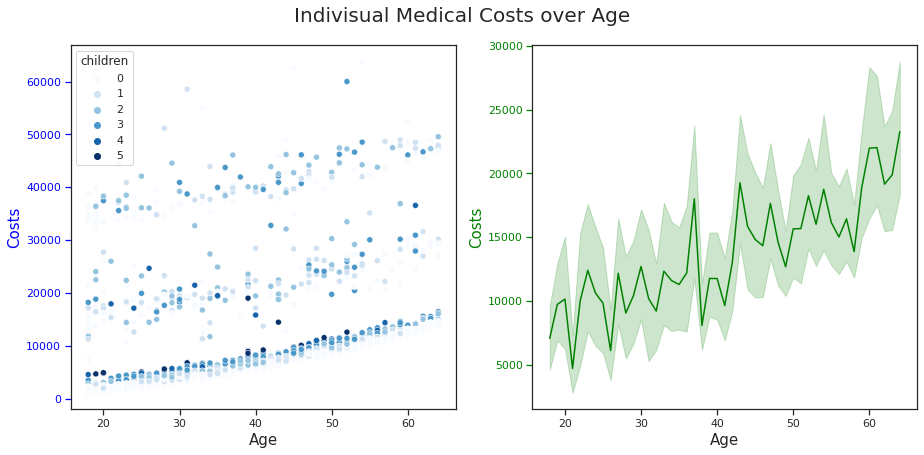

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[13, 6])
fig.suptitle('Indivisual Medical Costs over Age', y=1.05, size=20)

sns.scatterplot(ax=ax1, data=insurance, x='age', y='charges', hue='children', palette='Blues')
sns.lineplot(ax=ax2, data=insurance, x='age', y='charges', color='green')

ax1.set_xlabel('Age', fontsize=15)
ax1.set_ylabel('Costs', fontsize=15, color='blue')
ax1.tick_params('y', colors = 'blue')
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Costs', fontsize=15, color='green')
ax2.tick_params('y', colors = 'green')

fig.tight_layout()
plt.show()

Medical costs depending on the number of children

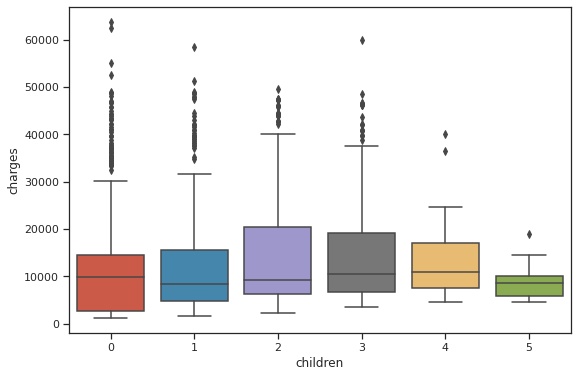

In [7]:
plt.figure(figsize=[9, 6])
sns.boxplot(data=insurance, x='children', y='charges')
plt.show()

Density functions of Medical costs about 'sex'

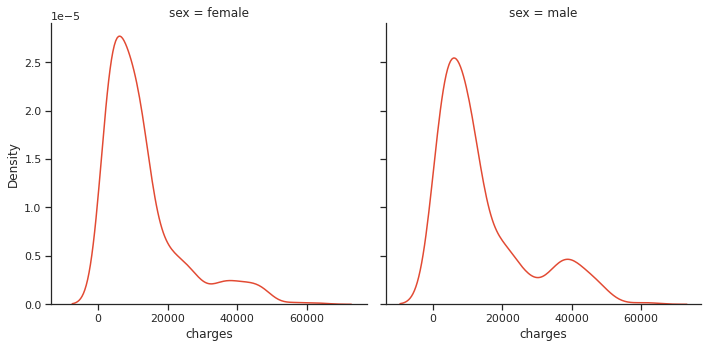

In [8]:
sns.displot(data=insurance, x='charges', kind='kde', col='sex', col_wrap=2)
plt.show()

Medical costs about 'smoker'

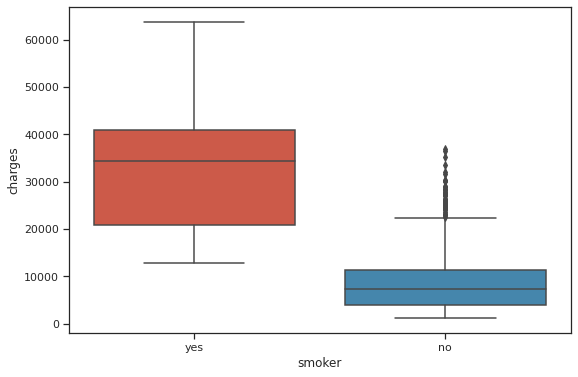

In [9]:
plt.figure(figsize=[9, 6])
sns.boxplot(data=insurance, x='smoker', y='charges')
plt.show()

Average BMI and Costs over Age

In [10]:
by_age = insurance.groupby('age').mean()

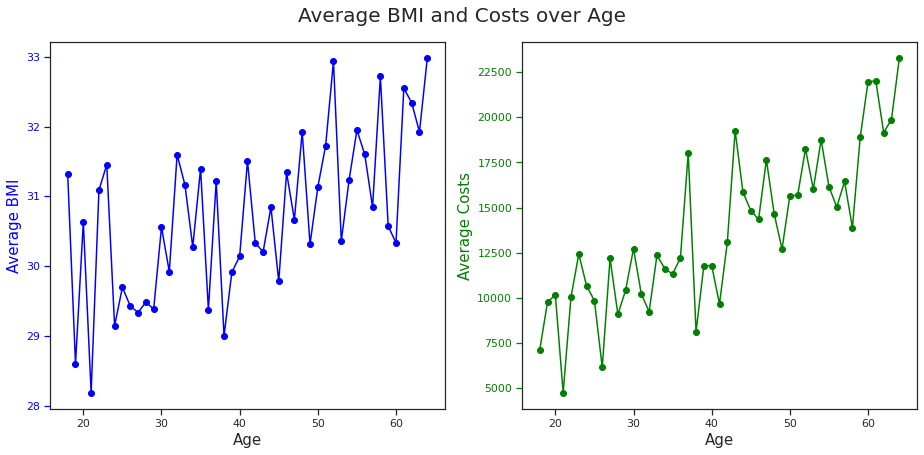

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[13,6])
fig.suptitle('Average BMI and Costs over Age', y=1.05, size=20)

ax1.plot(by_age.index, by_age['bmi'], color='blue', marker='o')
ax2.plot(by_age.index, by_age['charges'], color='green', marker='o')

ax1.set_xlabel('Age', fontsize=15)
ax1.set_ylabel('Average BMI', fontsize=15, color='blue')
ax1.tick_params('y', colors = 'blue')
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Average Costs', fontsize=15, color='green')
ax2.tick_params('y', colors = 'green')

fig.tight_layout()
plt.show()

Putting the two line plots on the same x-axis (without grouping)

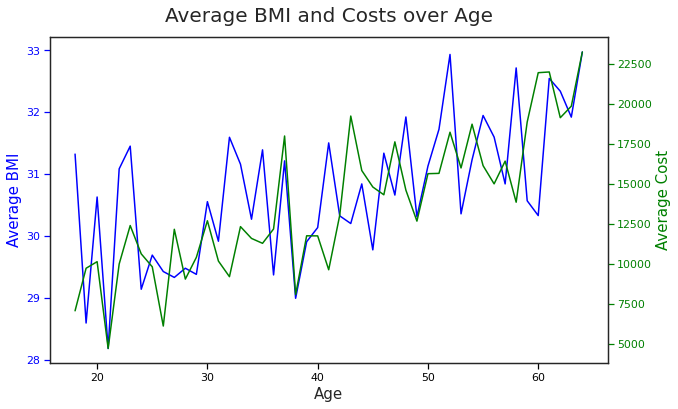

In [12]:
fig, ax = plt.subplots(figsize=[10, 6])
ax1 = ax.twinx()

sns.lineplot(ax=ax, data=insurance, x='age', y='bmi', ci=None, color='blue')
sns.lineplot(ax=ax1, data=insurance, x='age', y='charges', ci=None, color='green')

ax.set_title('Average BMI and Costs over Age', fontsize=20, pad=15)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Average BMI', color = 'blue', fontsize=15)
ax.tick_params('y', colors = 'blue')
ax.tick_params('x', colors = 'black')
ax1.set_ylabel('Average Cost', color = 'green', fontsize=15)
ax1.tick_params('y', colors = 'green')

plt.show()

Bar and Box plots of 'charges' over 'region'

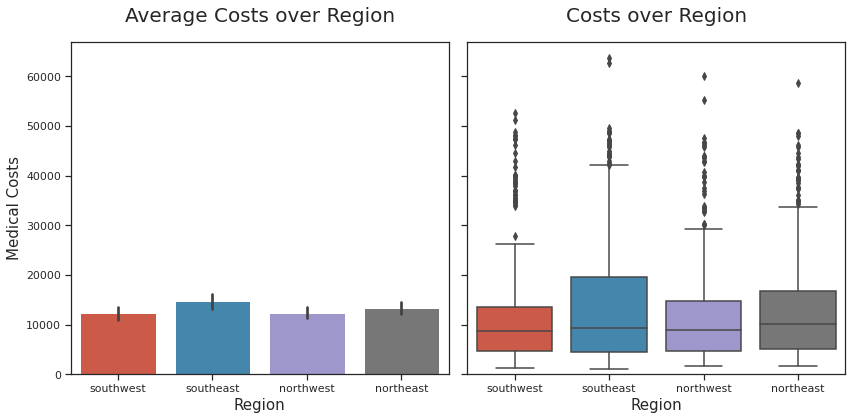

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12, 6], sharex=True, sharey=True)
sns.barplot(ax=ax1, data=insurance, x='region', y='charges')
sns.boxplot(ax=ax2, data=insurance, y='charges', x='region')
ax1.set_title('Average Costs over Region', fontsize=20, pad=20)
ax1.set_xlabel('Region', fontsize=15)
ax1.set_ylabel('Medical Costs', fontsize=15)
ax2.set_title('Costs over Region', fontsize=20, pad=20)
ax2.set_xlabel('Region', fontsize=15)
ax2.set_ylabel(None)
fig.tight_layout()
plt.show()

Bar and Box plots of 'charges' over 'region' grouped by 'sex'

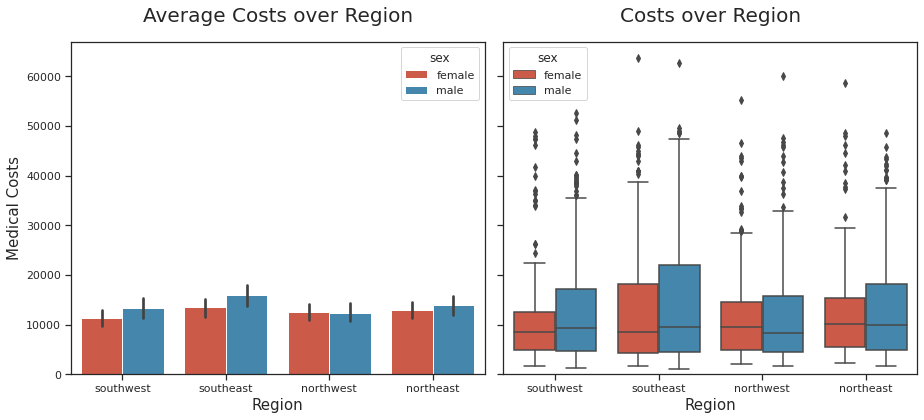

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[13, 6], sharex=True, sharey=True)
sns.barplot(ax=ax1, data=insurance, x='region', y='charges', hue='sex')
sns.boxplot(ax=ax2, data=insurance, y='charges', x='region', hue='sex')
ax1.set_title('Average Costs over Region', fontsize=20, pad=20)
ax1.set_xlabel('Region', fontsize=15)
ax1.set_ylabel('Medical Costs', fontsize=15)
ax2.set_title('Costs over Region', fontsize=20, pad=20)
ax2.set_xlabel('Region', fontsize=15)
ax2.set_ylabel(None)
fig.tight_layout()
plt.show()

## **Simulating about Median Costs**

Constructing a 95% confidence interval for the column 'charges'

In [15]:
insurance['charges'].median()

9382.033

In [16]:
insurance_sample = insurance.sample(n=1000, random_state=6)
original_sample = insurance_sample['charges']
median_boot_samples = []
np.random.seed(66)
for i in range(1000):
  boot_sample = np.random.choice(original_sample, 1000)
  median_boot_samples.append(np.median(boot_sample))

In [17]:
original_sample.median()

9382.033

In [18]:
conf_int = np.percentile(median_boot_samples, [2.5, 97.5])
conf_int

array([ 8810.5192, 10043.249 ])